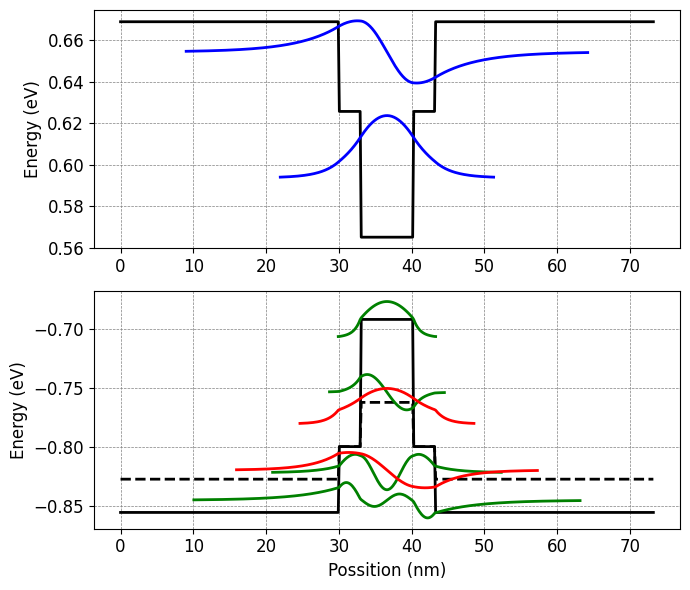

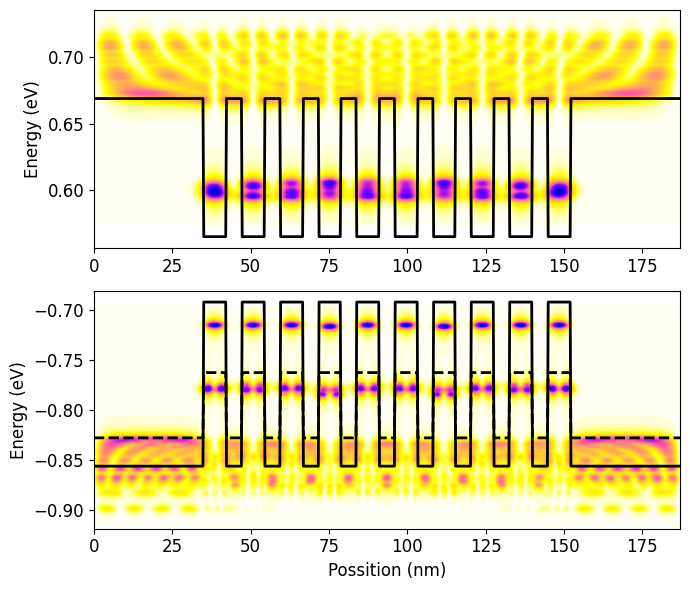

In [1]:
from solcore import si, material
from solcore.structure import Layer, Structure
import solcore.quantum_mechanics as QM

# First we create the materials we need
bulk = material("GaAsP")(T=293, strained=True)
barrier = material("GaAs")(T=293, P=0.1, strained=True)
bottom = material("AlGaAs")(T=293, Strained = True)

# As well as some of the layers
top_layer = Layer(width=si("1um"), material=barrier)
inter = Layer(width=si("4um"), material=bulk)
#barrier_layer = Layer(width=si("5nm"), material=barrier)
bottom_layer = Layer(width=si("4um"))

# We create the QW material at the given composition
QW = material("InGaAs")(T=293, In=0.15, strained=True) #???

# And the layer
well_layer = Layer(width=si("7.2nm"), material=QW) #???

# The following lines create the QW structure, with different number of QWs and interlayers. Indicating the substrate
# material with the keyword "substrate" is essential in order to calculate correctly the strain.

# A single QW with interlayers

list = [top_layer] + 10*[inter, well_layer, inter] + [bottom_layer]

test_structure_1 = Structure(list, substrate=bulk)
output_1 = QM.schrodinger(test_structure_1, quasiconfined=0, graphtype='potentials', num_eigenvalues=20, show=True)

# 10 QWs without interlayers
#test_structure_2 = Structure([top_layer, barrier_layer] + 10 * [well_layer, barrier_layer] + [bottom_layer],
#                             substrate=bulk)
#output_2 = QM.schrodinger(test_structure_2, quasiconfined=0.05, graphtype='potentialsLDOS', num_eigenvalues=200,
#                          show=True)